Uses digit data from http://www.iapr-tc11.org/mediawiki/index.php/ICDAR_2005_Robust_Reading_Competitions

# Load Data and Split

In [1]:
import struct
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [2]:
# a function for reading mnist-format files

def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [3]:
# read image and label files

digits = read_idx('data/digit_images.bin')
labels = read_idx('data/digit_labels.bin')

digits.shape, labels.shape

((988, 28, 28), (988,))

In [4]:
print(len(np.unique(labels)), [l for l in np.unique(labels)])

10 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


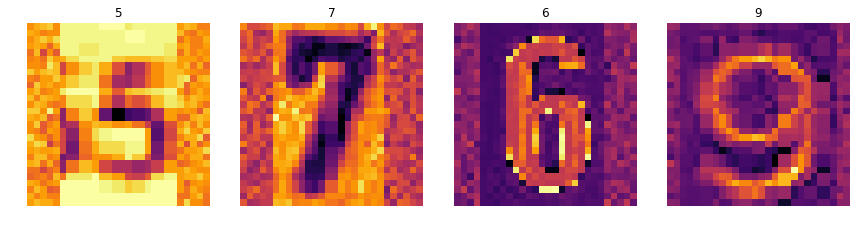

In [5]:
# run multiple times to see different images

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,12))

for ax in axes:
    idx = np.random.randint(0, len(digits))
    ax.imshow(digits[idx], cmap ='inferno')
    ax.set_title(labels[idx])
    ax.axis('off')
    
fig.tight_layout()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [7]:
# one-hot-encode labels and reshape images
labels_ohe = OneHotEncoder(categories='auto').fit_transform(labels[..., None])
digits = digits[..., None]

X_train, X_test, y_train, y_test = train_test_split(digits, labels_ohe)

# Make Keras Model

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, Dense, InputLayer, Flatten, MaxPool2D, BatchNormalization

Using TensorFlow backend.


In [131]:
droprate = 0.25

model = Sequential()
model.add(InputLayer(input_shape=(28,28, 1)))

model.add(Conv2D(16, (3,3), padding='same', activation='relu', kernel_regularizer='l2'))
model.add(Dropout(droprate))
model.add(MaxPool2D())

model.add(Conv2D(32, (3,3), padding='same', activation='relu', kernel_regularizer='l2'))
model.add(Dropout(droprate))
model.add(MaxPool2D())

model.add(Conv2D(64, (3,3), padding='same', activation='relu', kernel_regularizer='l2'))
model.add(Dropout(droprate))
model.add(MaxPool2D())

model.add(Conv2D(128, (3,3), padding='same', activation='relu', kernel_regularizer='l2'))
model.add(Dropout(droprate))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(10, activation='softmax', kernel_regularizer='l2'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
dropout_13 (Dropout)         (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
dropout_14 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 7, 7, 64)          18496     
__________

In [132]:
history = model.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_test, y_test))

Train on 741 samples, validate on 247 samples
Epoch 1/50
741/741 [==============================] - 1s 2ms/step - loss: 16.3625 - acc: 0.0634 - val_loss: 16.2783 - val_acc: 0.0607
Epoch 2/50
741/741 [==============================] - 0s 554us/step - loss: 16.1606 - acc: 0.0634 - val_loss: 16.1420 - val_acc: 0.0607
Epoch 3/50
741/741 [==============================] - 0s 547us/step - loss: 16.0537 - acc: 0.0634 - val_loss: 16.0527 - val_acc: 0.0607
Epoch 4/50
741/741 [==============================] - 0s 551us/step - loss: 15.9728 - acc: 0.0634 - val_loss: 15.9793 - val_acc: 0.0607
Epoch 5/50
741/741 [==============================] - 0s 556us/step - loss: 15.9045 - acc: 0.0634 - val_loss: 15.9158 - val_acc: 0.0607
Epoch 6/50
741/741 [==============================] - 0s 547us/step - loss: 15.8447 - acc: 0.0634 - val_loss: 15.8595 - val_acc: 0.0607
Epoch 7/50
741/741 [==============================] - 0s 549us/step - loss: 15.7911 - acc: 0.0634 - val_loss: 15.8087 - val_acc: 0.0607
Epoc

In [133]:
history = model.fit(X_train, y_train, batch_size=64, epochs=25, validation_data=(X_test, y_test))

Train on 741 samples, validate on 247 samples
Epoch 1/25
741/741 [==============================] - 0s 152us/step - loss: 0.7519 - acc: 0.8691 - val_loss: 1.2762 - val_acc: 0.7126
Epoch 2/25
741/741 [==============================] - 0s 150us/step - loss: 0.7315 - acc: 0.8650 - val_loss: 1.2494 - val_acc: 0.7449
Epoch 3/25
741/741 [==============================] - 0s 150us/step - loss: 0.6903 - acc: 0.8880 - val_loss: 1.2539 - val_acc: 0.7449
Epoch 4/25
741/741 [==============================] - 0s 146us/step - loss: 0.6249 - acc: 0.9163 - val_loss: 1.1846 - val_acc: 0.7733
Epoch 5/25
741/741 [==============================] - 0s 147us/step - loss: 0.6654 - acc: 0.9028 - val_loss: 1.2314 - val_acc: 0.7571
Epoch 6/25
741/741 [==============================] - 0s 150us/step - loss: 0.6180 - acc: 0.9069 - val_loss: 1.1937 - val_acc: 0.7692
Epoch 7/25
741/741 [==============================] - 0s 152us/step - loss: 0.6029 - acc: 0.9109 - val_loss: 1.1846 - val_acc: 0.7814
Epoch 8/25
741/7

In [209]:
droprate = 0.25

model2 = Sequential()
model2.add(InputLayer(input_shape=(None, None, 1)))

model2.add(Conv2D(16, (3,3), padding='same', activation='relu', kernel_regularizer='l2'))
model2.add(Dropout(droprate))
model2.add(MaxPool2D())

model2.add(Conv2D(32, (3,3), padding='same', activation='relu', kernel_regularizer='l2'))
model2.add(Dropout(droprate))
model2.add(MaxPool2D())

model2.add(Conv2D(64, (3,3), padding='same', activation='relu', kernel_regularizer='l2'))
model2.add(Dropout(droprate))
model2.add(MaxPool2D())

model2.add(Conv2D(128, (3,3), padding='same', activation='relu', kernel_regularizer='l2'))
model2.add(Dropout(droprate))
model2.add(MaxPool2D())

model2.add(Conv2D(10, (1,1), padding='same', activation='sigmoid', kernel_regularizer='l2'))
model2.compile(optimizer='adam', loss='categorical_crossentropy')

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, None, None, 16)    160       
_________________________________________________________________
dropout_25 (Dropout)         (None, None, None, 16)    0         
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, None, None, 16)    0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, None, None, 32)    4640      
_________________________________________________________________
dropout_26 (Dropout)         (None, None, None, 32)    0         
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, None, None, 32)    0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, None, None, 64)    18496     
__________

In [210]:
m1w = model.get_weights()

In [211]:
m1w[-2] = m1w[-2].reshape((1, 1, 128, 10))

In [212]:
for w in m1w:
    print(w.shape)

(3, 3, 1, 16)
(16,)
(3, 3, 16, 32)
(32,)
(3, 3, 32, 64)
(64,)
(3, 3, 64, 128)
(128,)
(1, 1, 128, 10)
(10,)


In [213]:
model2.set_weights(m1w)

In [214]:
preds = model2.predict(X_test)

In [215]:
preds = preds.squeeze()

In [216]:
preds_cat = np.argmax(preds, axis=-1)
labs_cat = np.argmax(y_test, axis=-1)

In [217]:
np.mean(preds_cat == labs_cat)

0.11912996443147732

# Evaluate on New Image

In [150]:
from imageio import imread

In [222]:
def predict_on_file(filename):
    img = imread(filename, as_gray=True)
    plt.imshow(img, cmap='gray');
    activations = model2.predict(img[None, ..., None])[0]
    return activations

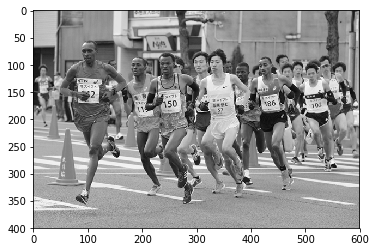

In [223]:
a1 = predict_on_file('testimage.png')

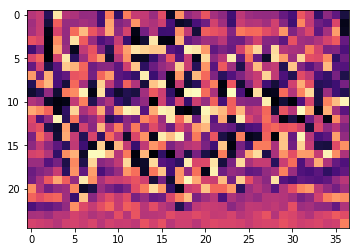

In [224]:
plt.imshow(a1[..., 2], cmap='magma')

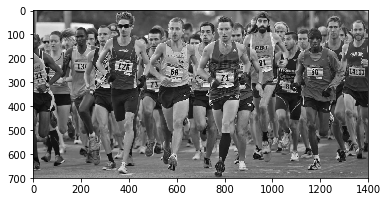

In [225]:
a2 = predict_on_file('testimage2.jpg')

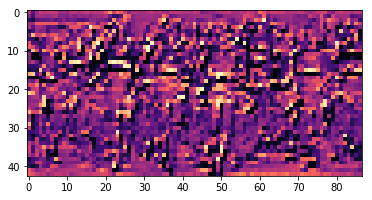

In [226]:
plt.imshow(a2[..., 7], cmap='magma')

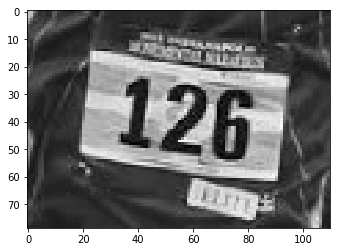

In [227]:
a3 = predict_on_file('testimage3.png')

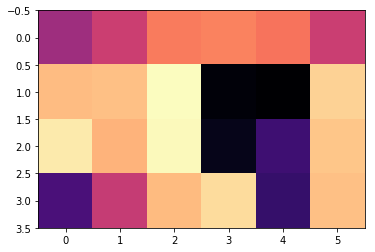

In [229]:
plt.imshow(a3[..., 1], cmap='magma')